In [ ]:
# https://towardsdatascience.com/shap-how-to-interpret-machine-learning-models-with-python-2323f5af4be9

In [16]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [33]:
df = pd.read_csv("winequality-white.csv", sep=";")
print(df.shape)
df.head(3)

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


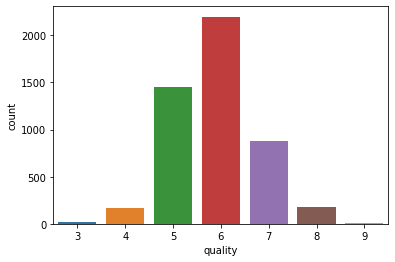

In [69]:
import seaborn as sns
sns.countplot(df["quality"]);

In [40]:
from sklearn import model_selection

X = df.drop("quality", axis=1)
y = df.quality

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)


In [41]:
import lightgbm as lgb
from sklearn import metrics

In [42]:
clf = lgb.LGBMClassifier()

clf.fit(xtrain, ytrain)
preds = clf.predict(xtest)
acc = metrics.accuracy_score(ytest, preds)

print(f"Accuracy={acc:.3f}")

Accuracy=0.645


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model=clf)
shap_values = explainer.shap_values(X=X)

In [ ]:
shap.dependence_plot('alcohol', shap_values[0], X)

In [ ]:
shap.dependence_plot('alcohol', shap_values[1], X)

In [ ]:
shap.summary_plot(shap_values, X)

In [103]:
explainer = shap.TreeExplainer(model=clf)
shap_values = explainer.shap_values(X=X)

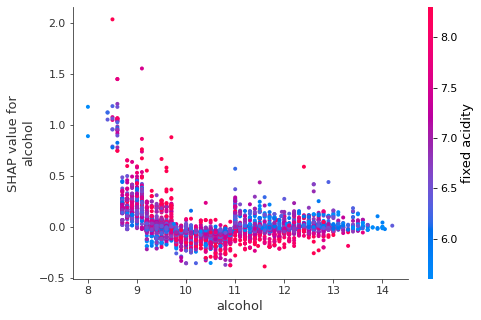

In [104]:
shap.dependence_plot('alcohol', shap_values[0], X)

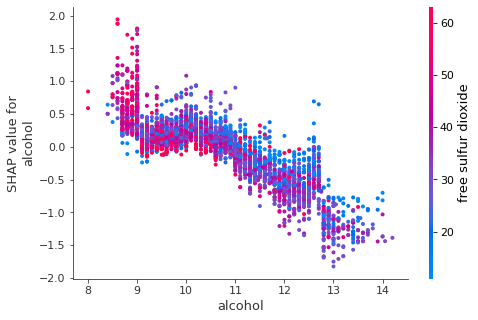

In [105]:
shap.dependence_plot('alcohol', shap_values[1], X)

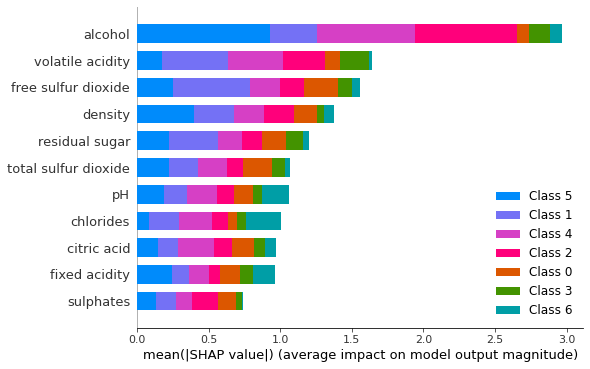

In [106]:
shap.summary_plot(shap_values, X)